# CSC 407/607 Network Analysis
## Graduate Project

In [1]:
import pandas as pd
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_r = pd.read_csv("../data/reviews.csv")
df_r.drop('Unnamed: 0',inplace=True, axis=1)
df_r

review_id                 user_id  \
0        KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA   
1        BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q   
2        saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A   
3        AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ   
4        Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ   
...                         ...                     ...   
6990275  H0RIamZu0B0Ei0P4aeh3sQ  qskILQ3k0I_qcCMI-k6_QQ   
6990276  shTPgbgdwTHSuU67mGCmZQ  Zo0th2m8Ez4gLSbHftiQvg   
6990277  YNfNhgZlaaCO5Q_YJR4rEw  mm6E4FbCMwJmb7kPDZ5v2Q   
6990278  i-I4ZOhoX70Nw5H0FwrQUA  YwAMC-jvZ1fvEUum6QkEkw   
6990279  RwcKOdEuLRHNJe4M9-qpqg  6JehEvdoCvZPJ_XIxnzIIw   

                    business_id  
0        XQfwVwDr-v0ZS3_CbbE5Xw  
1        7ATYjTIgM3jUlt4UM3IypQ  
2        YjUWPpI6HXG530lwP-fb2A  
3        kxX2SOes4o-D3ZQBkiMRfA  
4        e4Vwtrqf-wpJfwesgvdgxQ  
...                         ...  
6990275  jals67o91gcrD4DC81Vk6w  
6990276  2vLksaMmSEcGbjI5gywpZA  
6990277  R1khUUxidqfaJmcpmGd4aw  
6990278  Rr9kKArrMhSLVE9a53q-aA  
6990279  VAeEXLbEcI9Emt9KGYq9aA  

[6990280 rows x 3 columns]

In [3]:
len(df_r['user_id'].unique())

1987929

In [4]:
df_b = pd.read_csv("../data/business.csv")
df_b.drop('Unnamed: 0',inplace=True, axis=1)
df_b

business_id                      name  \
0       Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1       mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2       tUFrWirKiKi_TAnsVWINQQ                    Target   
3       MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4       mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   
...                        ...                       ...   
150341  IUQopTMmYQG-qRtBk-8QnA              Binh's Nails   
150342  c8GjPIOTGVmIemT7j5_SyQ      Wild Birds Unlimited   
150343  _QAMST-NrQobXduilWEqSw         Claire's Boutique   
150344  mtGm22y5c2UHNXDFAjaPNw  Cyclery & Fitness Center   
150345  jV_XOycEzSlTx-65W906pg                   Sic Ink   

                                address           city state postal_code  \
0                1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1       87 Grasso Plaza Shopping Center         Affton    MO       63123   
2                  5255 E Broadway Blvd         Tucson    AZ       85711   
3                           935 Race St   Philadelphia    PA       19107   
4                         101 Walnut St     Green Lane    PA       18054   
...                                 ...            ...   ...         ...   
150341                3388 Gateway Blvd       Edmonton    AB     T6J 5H2   
150342               2813 Bransford Ave      Nashville    TN       37204   
150343           6020 E 82nd St, Ste 46   Indianapolis    IN       46250   
150344                     2472 Troy Rd   Edwardsville    IL       62025   
150345            238 Apollo Beach Blvd   Apollo beach    FL       33572   

         latitude   longitude  stars  review_count  is_open  \
0       34.426679 -119.711197    5.0             7        0   
1       38.551126  -90.335695    3.0            15        1   
2       32.223236 -110.880452    3.5            22        0   
3       39.955505  -75.155564    4.0            80        1   
4       40.338183  -75.471659    4.5            13        1   
...           ...         ...    ...           ...      ...   
150341  53.468419 -113.492054    3.0            13        1   
150342  36.115118  -86.766925    4.0             5        1   
150343  39.908707  -86.065088    3.5             8        1   
150344  38.782351  -89.950558    4.0            24        1   
150345  27.771002  -82.394910    4.5             9        1   

                                               attributes  \
0                           {'ByAppointmentOnly': 'True'}   
1                  {'BusinessAcceptsCreditCards': 'True'}   
2       {'BikeParking': 'True', 'BusinessAcceptsCredit...   
3       {'RestaurantsDelivery': 'False', 'OutdoorSeati...   
4       {'BusinessAcceptsCreditCards': 'True', 'Wheelc...   
...                                                   ...   
150341  {'ByAppointmentOnly': 'False', 'RestaurantsPri...   
150342  {'BusinessAcceptsCreditCards': 'True', 'Restau...   
150343  {'RestaurantsPriceRange2': '1', 'BusinessAccep...   
150344  {'BusinessParking': "{'garage': False, 'street...   
150345  {'WheelchairAccessible': 'True', 'BusinessAcce...   

                                               categories  \
0       Doctors, Traditional Chinese Medicine, Naturop...   
1       Shipping Centers, Local Services, Notaries, Ma...   
2       Department Stores, Shopping, Fashion, Home & G...   
3       Restaurants, Food, Bubble Tea, Coffee & Tea, B...   
4                               Brewpubs, Breweries, Food   
...                                                   ...   
150341                         Nail Salons, Beauty & Spas   
150342  Pets, Nurseries & Gardening, Pet Stores, Hobby...   
150343  Shopping, Jewelry, Piercing, Toy Stores, Beaut...   
150344  Fitness/Exercise Equipment, Eyewear & Optician...   
150345  Beauty & Spas, Permanent Makeup, Piercing, Tattoo   

                                                    hours  
0                                                     NaN  
1       {'Monday': '0:0-0:0', 'Tuesday': '

### Merging review dataset and business dataset

In [5]:
merge=df_b.merge(df_r,on='business_id',how='inner')
merge

business_id                      name  \
0        Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1        Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
2        Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
3        Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
4        Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
...                         ...                       ...   
6990275  jV_XOycEzSlTx-65W906pg                   Sic Ink   
6990276  jV_XOycEzSlTx-65W906pg                   Sic Ink   
6990277  jV_XOycEzSlTx-65W906pg                   Sic Ink   
6990278  jV_XOycEzSlTx-65W906pg                   Sic Ink   
6990279  jV_XOycEzSlTx-65W906pg                   Sic Ink   

                        address           city state postal_code   latitude  \
0        1616 Chapala St, Ste 2  Santa Barbara    CA       93101  34.426679   
1        1616 Chapala St, Ste 2  Santa Barbara    CA       93101  34.426679   
2        1616 Chapala St, Ste 2  Santa Barbara    CA       93101  34.426679   
3        1616 Chapala St, Ste 2  Santa Barbara    CA       93101  34.426679   
4        1616 Chapala St, Ste 2  Santa Barbara    CA       93101  34.426679   
...                         ...            ...   ...         ...        ...   
6990275   238 Apollo Beach Blvd   Apollo beach    FL       33572  27.771002   
6990276   238 Apollo Beach Blvd   Apollo beach    FL       33572  27.771002   
6990277   238 Apollo Beach Blvd   Apollo beach    FL       33572  27.771002   
6990278   238 Apollo Beach Blvd   Apollo beach    FL       33572  27.771002   
6990279   238 Apollo Beach Blvd   Apollo beach    FL       33572  27.771002   

          longitude  stars  review_count  is_open  \
0       -119.711197    5.0             7        0   
1       -119.711197    5.0             7        0   
2       -119.711197    5.0             7        0   
3       -119.711197    5.0             7        0   
4       -119.711197    5.0             7        0   
...             ...    ...           ...      ...   
6990275  -82.394910    4.5             9        1   
6990276  -82.394910    4.5             9        1   
6990277  -82.394910    4.5             9        1   
6990278  -82.394910    4.5             9        1   
6990279  -82.394910    4.5             9        1   

                                                attributes  \
0                            {'ByAppointmentOnly': 'True'}   
1                            {'ByAppointmentOnly': 'True'}   
2                            {'ByAppointmentOnly': 'True'}   
3                            {'ByAppointmentOnly': 'True'}   
4                            {'ByAppointmentOnly': 'True'}   
...                                                    ...   
6990275  {'WheelchairAccessible': 'True', 'BusinessAcce...   
6990276  {'WheelchairAccessible': 'True', 'BusinessAcce...   
6990277  {'WheelchairAccessible': 'True', 'BusinessAcce...   
6990278  {'WheelchairAccessible': 'True', 'BusinessAcce...   
6990279  {'WheelchairAccessible': 'True', 'BusinessAcce...   

                                                categories  \
0        Doctors, Traditional Chinese Medicine, Naturop...   
1        Doctors, Traditional Chinese Medicine, Naturop...   
2        Doctors, Traditional Chinese Medicine, Naturop...   
3        Doctors, Traditional Chinese Medicine, Naturop...   
4        Doctors, Traditional Chinese Medicine, Naturop...   
...                                                    ...   
6990275  Beauty & Spas, Permanent Makeup, Piercing, Tattoo   
6990276  Beauty & Spas, Permanent Makeup, Piercing, Tattoo   
6990277  Beauty & Spas, Permanent Makeup, Piercing, Tattoo   
6990278  Beauty & Spas, Permanent Makeup, Piercing, Tattoo   
6990279  Beauty & Spas, Permanent Makeup, Piercing, Tattoo   

                                                     hours  \
0                                                      NaN   
1                                                      NaN   
2                        

In [6]:
merge['state'].unique()

array(['CA', 'MO', 'AZ', 'PA', 'TN', 'FL', 'IN', 'LA', 'AB', 'NV', 'ID',
       'DE', 'IL', 'NJ', 'NC', 'CO', 'WA', 'HI', 'UT', 'TX', 'MT', 'MI',
       'SD', 'XMS', 'MA', 'VI', 'VT'], dtype=object)

### Selecting the state as California CA:

In [7]:
state1=["CA"]
CA=merge.loc[merge['state'].isin(state1)]
CA

business_id                      name  \
0        Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1        Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
2        Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
3        Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
4        Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
...                         ...                       ...   
6988236  JhSByBTYY1rGstRy76YmLA         Reiki with Darren   
6988237  JhSByBTYY1rGstRy76YmLA         Reiki with Darren   
6988238  JhSByBTYY1rGstRy76YmLA         Reiki with Darren   
6988239  JhSByBTYY1rGstRy76YmLA         Reiki with Darren   
6988240  JhSByBTYY1rGstRy76YmLA         Reiki with Darren   

                        address           city state postal_code   latitude  \
0        1616 Chapala St, Ste 2  Santa Barbara    CA       93101  34.426679   
1        1616 Chapala St, Ste 2  Santa Barbara    CA       93101  34.426679   
2        1616 Chapala St, Ste 2  Santa Barbara    CA       93101  34.426679   
3        1616 Chapala St, Ste 2  Santa Barbara    CA       93101  34.426679   
4        1616 Chapala St, Ste 2  Santa Barbara    CA       93101  34.426679   
...                         ...            ...   ...         ...        ...   
6988236                     NaN  Santa Barbara    CA       93105  34.420831   
6988237                     NaN  Santa Barbara    CA       93105  34.420831   
6988238                     NaN  Santa Barbara    CA       93105  34.420831   
6988239                     NaN  Santa Barbara    CA       93105  34.420831   
6988240                     NaN  Santa Barbara    CA       93105  34.420831   

          longitude  stars  review_count  is_open  \
0       -119.711197    5.0             7        0   
1       -119.711197    5.0             7        0   
2       -119.711197    5.0             7        0   
3       -119.711197    5.0             7        0   
4       -119.711197    5.0             7        0   
...             ...    ...           ...      ...   
6988236 -119.698190    5.0             7        1   
6988237 -119.698190    5.0             7        1   
6988238 -119.698190    5.0             7        1   
6988239 -119.698190    5.0             7        1   
6988240 -119.698190    5.0             7        1   

                                                attributes  \
0                            {'ByAppointmentOnly': 'True'}   
1                            {'ByAppointmentOnly': 'True'}   
2                            {'ByAppointmentOnly': 'True'}   
3                            {'ByAppointmentOnly': 'True'}   
4                            {'ByAppointmentOnly': 'True'}   
...                                                    ...   
6988236  {'BusinessAcceptsCreditCards': 'True', 'ByAppo...   
6988237  {'BusinessAcceptsCreditCards': 'True', 'ByAppo...   
6988238  {'BusinessAcceptsCreditCards': 'True', 'ByAppo...   
6988239  {'BusinessAcceptsCreditCards': 'True', 'ByAppo...   
6988240  {'BusinessAcceptsCreditCards': 'True', 'ByAppo...   

                                                categories  \
0        Doctors, Traditional Chinese Medicine, Naturop...   
1        Doctors, Traditional Chinese Medicine, Naturop...   
2        Doctors, Traditional Chinese Medicine, Naturop...   
3        Doctors, Traditional Chinese Medicine, Naturop...   
4        Doctors, Traditional Chinese Medicine, Naturop...   
...                                                    ...   
6988236  Health & Medical, Supernatural Readings, Hospi...   
6988237  Health & Medical, Supernatural Readings, Hospi...   
6988238  Health & Medical, Supernatural Readings, Hospi...   
6988239  Health & Medical, Supernatural Readings, Hospi...   
6988240  Health & Medical, Supernatural Readings, Hospi...   

                                                     hours  \
0                                                      NaN   
1                                                      NaN   
2                        

In [8]:
CA['city'].unique()

array(['Santa Barbara', 'Isla Vista', 'Goleta', 'Carpinteria',
       'Montecito', 'santa Barbara', 'Truckee', 'Santa Barbara ',
       'Ventura', 'Summerland', 'Port Hueneme', 'West Hill', 'Santa Ynez',
       'Sparks', 'Kings Beach', 'Mission Canyon', 'Los Angeles', 'Tampa',
       'Oxnard', 'Cerritos', 'Eagle', 'Reno', 'Meridian', 'Santa Clara',
       'Valencia', 'Real Goleta', 'Santa Barbara,', 'Spring Hill',
       'Aliso Viejo', 'SANTA BARBARA AP', 'South Lake Tahoe',
       'Santa Barbara & Ventura Counties', 'Santa Barbra',
       'SANTA BARBARA', 'Costa Mesa', 'Santa  Barbara', 'Salinas',
       'Carpinteria ', 'Santa Maria'], dtype=object)

## Selecting 'Montecito' Metropolitan area 

In [9]:
metropolitian_area=['Montecito']
data_city1=CA.loc[CA['city'].isin(metropolitian_area)]
data_city1

business_id                      name             address  \
41425    Ed7RUOj9MTUf9U-Y73bYlw  Run Montecito-Summerland                 NaN   
41426    Ed7RUOj9MTUf9U-Y73bYlw  Run Montecito-Summerland                 NaN   
41427    Ed7RUOj9MTUf9U-Y73bYlw  Run Montecito-Summerland                 NaN   
41428    Ed7RUOj9MTUf9U-Y73bYlw  Run Montecito-Summerland                 NaN   
41429    Ed7RUOj9MTUf9U-Y73bYlw  Run Montecito-Summerland                 NaN   
...                         ...                       ...                 ...   
6969012  E3KJdHSTeKcgkSPpjKmH4g    San Ysidro Falls Trail  1814 E Mountain Dr   
6969013  E3KJdHSTeKcgkSPpjKmH4g    San Ysidro Falls Trail  1814 E Mountain Dr   
6969014  E3KJdHSTeKcgkSPpjKmH4g    San Ysidro Falls Trail  1814 E Mountain Dr   
6969015  E3KJdHSTeKcgkSPpjKmH4g    San Ysidro Falls Trail  1814 E Mountain Dr   
6969016  E3KJdHSTeKcgkSPpjKmH4g    San Ysidro Falls Trail  1814 E Mountain Dr   

              city state postal_code   latitude   longitude  stars  \
41425    Montecito    CA       93108  34.436663 -119.632075    2.5   
41426    Montecito    CA       93108  34.436663 -119.632075    2.5   
41427    Montecito    CA       93108  34.436663 -119.632075    2.5   
41428    Montecito    CA       93108  34.436663 -119.632075    2.5   
41429    Montecito    CA       93108  34.436663 -119.632075    2.5   
...            ...   ...         ...        ...         ...    ...   
6969012  Montecito    CA       93108  34.445692 -119.620842    4.0   
6969013  Montecito    CA       93108  34.445692 -119.620842    4.0   
6969014  Montecito    CA       93108  34.445692 -119.620842    4.0   
6969015  Montecito    CA       93108  34.445692 -119.620842    4.0   
6969016  Montecito    CA       93108  34.445692 -119.620842    4.0   

         review_count  is_open  \
41425               8        1   
41426               8        1   
41427               8        1   
41428               8        1   
41429               8        1   
...               ...      ...   
6969012            18        1   
6969013            18        1   
6969014            18        1   
6969015            18        1   
6969016            18        1   

                                                attributes  \
41425    {'GoodForKids': 'False', 'BusinessParking': "{...   
41426    {'GoodForKids': 'False', 'BusinessParking': "{...   
41427    {'GoodForKids': 'False', 'BusinessParking': "{...   
41428    {'GoodForKids': 'False', 'BusinessParking': "{...   
41429    {'GoodForKids': 'False', 'BusinessParking': "{...   
...                                                    ...   
6969012  {'BikeParking': 'False', 'GoodForKids': 'False...   
6969013  {'BikeParking': 'False', 'GoodForKids': 'False...   
6969014  {'BikeParking': 'False', 'GoodForKids': 'False...   
6969015  {'BikeParking': 'False', 'GoodForKids': 'False...   
6969016  {'BikeParking': 'False', 'GoodForKids': 'False...   

                  categories hours               review_id  \
41425            Active Life   NaN  vDnwjAJAhzj1e4TcNdp7oQ   
41426            Active Life   NaN  GC8DlWyK_osQVNWwngUCwQ   
41427            Active Life   NaN  FXnxOyo65v58pJOZLsYY2A   
41428            Active Life   NaN  Tz_o4GFppHZ8I75vgZwcXw   
41429            Active Life   NaN  Y0vmt9DPJc56JP84MER8og   
...                      ...   ...                     ...   
6969012  Active Life, Hiking   NaN  81-054PIES41Gkc5rvMy7Q   
6969013  Active Life, Hiking   NaN  4_XDx6U57M49f3R8oXoddA   
6969014  Active Life, Hiking   NaN  nxchmlxCl0JCJaHcrVQNeA   
6969015  Active Life, Hiking   NaN  bbpFIaGFjguDpp06cPKqpw   
6969016  Active Life, Hiking   NaN  tkrue_AoPfmwF6zUVsX_9A   

                        user_id  
41425    Yl8I1nrxLlYeD6oXmzWuCg  
41426    _LbK9H21Hm6nx7FzjeGpEg  
41427    HCFJqoqXeg4RTw618ahSWw  
41428    zOI66J-QJsvPW0Fs427Byg  
41429    wUOGoRPLldV-VDPTxRZ_uw  
...                         ...  
6969012  gXe53TG58iwXJ-hFY3rjEQ  
6969013  amQmNcW6-aXcho2WZ2bboQ  
6

### a. Identify the total number of reviews for each business in one metropolitan area.

In [10]:
data_city1_group=data_city1.groupby('business_id')['review_count'].agg('mean').reset_index()
data_city1_group

business_id  review_count
0   00c8pf4wMH72fpkcRvWzAw           5.0
1   035gK3ASKDns-ojUSnV4IA         189.0
2   1J0NIfmrSuV72KzhmYFxMA          77.0
3   2WHu0k5VVM1Pn9AFzkSBlA         109.0
4   3KI0WnM1_lnY4QPRtT5O8A          74.0
..                     ...           ...
88  wjOHfRYCwddZ3Ri_AvScaQ          37.0
89  xHG-xznai_fgceFDl6xn5w         240.0
90  xfI3dkIVkvKfbaTBmdVTiA           8.0
91  yLqFm4epPkbkPpan9gmEjA          17.0
92  yzFJshX4R5ezvdaAL-mt0g          14.0

[93 rows x 2 columns]

b) **R selected is 105** , so selecting the data with review count more than 105

In [11]:
r105=data_city1.loc[(data_city1['review_count'] >= 105)]
r105

business_id                   name                address  \
270021   EaTbY8HFwwF7i3SjVbHGYw  Montecito Wine Bistro      516 San Ysidro Rd   
270022   EaTbY8HFwwF7i3SjVbHGYw  Montecito Wine Bistro      516 San Ysidro Rd   
270023   EaTbY8HFwwF7i3SjVbHGYw  Montecito Wine Bistro      516 San Ysidro Rd   
270024   EaTbY8HFwwF7i3SjVbHGYw  Montecito Wine Bistro      516 San Ysidro Rd   
270025   EaTbY8HFwwF7i3SjVbHGYw  Montecito Wine Bistro      516 San Ysidro Rd   
...                         ...                    ...                    ...   
5886154  2WHu0k5VVM1Pn9AFzkSBlA       Here's the Scoop  1187 Coast Village Rd   
5886155  2WHu0k5VVM1Pn9AFzkSBlA       Here's the Scoop  1187 Coast Village Rd   
5886156  2WHu0k5VVM1Pn9AFzkSBlA       Here's the Scoop  1187 Coast Village Rd   
5886157  2WHu0k5VVM1Pn9AFzkSBlA       Here's the Scoop  1187 Coast Village Rd   
5886158  2WHu0k5VVM1Pn9AFzkSBlA       Here's the Scoop  1187 Coast Village Rd   

              city state postal_code   latitude   longitude  stars  \
270021   Montecito    CA       93108  34.437323 -119.631319    4.0   
270022   Montecito    CA       93108  34.437323 -119.631319    4.0   
270023   Montecito    CA       93108  34.437323 -119.631319    4.0   
270024   Montecito    CA       93108  34.437323 -119.631319    4.0   
270025   Montecito    CA       93108  34.437323 -119.631319    4.0   
...            ...   ...         ...        ...         ...    ...   
5886154  Montecito    CA       93108  34.420914 -119.644962    3.5   
5886155  Montecito    CA       93108  34.420914 -119.644962    3.5   
5886156  Montecito    CA       93108  34.420914 -119.644962    3.5   
5886157  Montecito    CA       93108  34.420914 -119.644962    3.5   
5886158  Montecito    CA       93108  34.420914 -119.644962    3.5   

         review_count  is_open  \
270021            142        0   
270022            142        0   
270023            142        0   
270024            142        0   
270025            142        0   
...               ...      ...   
5886154           109        1   
5886155           109        1   
5886156           109        1   
5886157           109        1   
5886158           109        1   

                                                attributes  \
270021   {'NoiseLevel': "u'average'", 'WiFi': "u'free'"...   
270022   {'NoiseLevel': "u'average'", 'WiFi': "u'free'"...   
270023   {'NoiseLevel': "u'average'", 'WiFi': "u'free'"...   
270024   {'NoiseLevel': "u'average'", 'WiFi': "u'free'"...   
270025   {'NoiseLevel': "u'average'", 'WiFi': "u'free'"...   
...                                                    ...   
5886154  {'RestaurantsDelivery': 'True', 'RestaurantsTa...   
5886155  {'RestaurantsDelivery': 'True', 'RestaurantsTa...   
5886156  {'RestaurantsDelivery': 'True', 'RestaurantsTa...   
5886157  {'RestaurantsDelivery': 'True', 'RestaurantsTa...   
5886158  {'RestaurantsDelivery': 'True', 'RestaurantsTa...   

                                                categories  \
270021   Restaurants, Farmers Market, Bars, American (N...   
270022   Restaurants, Farmers Market, Bars, American (N...   
270023   Restaurants, Farmers Market, Bars, American (N...   
270024   Restaurants, Farmers Market, Bars, American (N...   
270025   Restaurants, Farmers Market, Bars, American (N...   
...                                                    ...   
5886154  Desserts, Gelato, Ice Cream & Frozen Yogurt, F...   
5886155  Desserts, Gelato, Ice Cream & Frozen Yogurt, F...   
5886156  Desserts, Gelato, Ice Cream & Frozen Yogurt, F...   
5886157  Desserts, Gelato, Ice Cream & Frozen Yogurt, F...   
5886158  Desserts, Gelato, Ice Cream & Frozen Yogurt, F...   

                                                     hours  \
270021   {'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...   
270022   {'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...   
270023   {'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...   
270024   {'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'... 

### checking for any repeated businesses

In [12]:
r105.business_id.duplicated().sum()

3185

In [13]:
r105.user_id.duplicated().sum()

415

**c. Among the remaining businesses, when two businesses have been reviewed by the same reviewer, connect them.**

In [14]:
# df = r105[r105.duplicated(subset=['business_id','user_id'], keep=False)]
df = r105

In [15]:
df_copy=df.copy()
df_copy_group=df_copy.groupby(['business_id','user_id'],as_index=False).sum()
df10=df_copy_group.drop(['latitude','longitude','stars','review_count','is_open'],axis=1)
df10

business_id                 user_id
0     035gK3ASKDns-ojUSnV4IA  -6CxmvldpY4H453jw9Mx-A
1     035gK3ASKDns-ojUSnV4IA  -VWzgY7WM2e5oQI_Zl37OQ
2     035gK3ASKDns-ojUSnV4IA  -gTBP4tSM6R9XwYK_bdKyA
3     035gK3ASKDns-ojUSnV4IA  0fIJRZEY8aYeKwb0_h8mEA
4     035gK3ASKDns-ojUSnV4IA  0y4V3IbJ6x2gTFVvtwn_sA
...                      ...                     ...
3089  xHG-xznai_fgceFDl6xn5w  yuk55L6o0VI5KG04lMy5Lg
3090  xHG-xznai_fgceFDl6xn5w  yxNYLAWeqW6BKUPMujnl4Q
3091  xHG-xznai_fgceFDl6xn5w  zJIpM80K_6C6XMmgeBjdSg
3092  xHG-xznai_fgceFDl6xn5w  zK4R5IFl5aBqePPEd0fvxw
3093  xHG-xznai_fgceFDl6xn5w  zqMavujs1U4DwmODobkcpA

[3094 rows x 2 columns]

In [16]:
#Sample list of businesses that satisfy the requirement
df10.business_id.unique()

array(['035gK3ASKDns-ojUSnV4IA', '2WHu0k5VVM1Pn9AFzkSBlA',
       'EaTbY8HFwwF7i3SjVbHGYw', 'H-1qpp_77KggOAr9htUrEw',
       'Po6WLHD5ZFkVoiuTFL3Jtg', 'S3QHy1sshUeZwXOYviVsXQ',
       'S4ujTsHtCOsHKrKkcjY30Q', 'b5hxsRw76UUXcotxlCipuQ',
       'e0DU7_0mfalr-lnyUafiag', 'eX7o_-s5TmDT-DMfTV4cmw',
       'iMTjejk6apJKzCukZnDw5A', 'xHG-xznai_fgceFDl6xn5w'], dtype=object)

In [17]:
user_list=df10.user_id.unique()
user_list

array(['-6CxmvldpY4H453jw9Mx-A', '-VWzgY7WM2e5oQI_Zl37OQ',
       '-gTBP4tSM6R9XwYK_bdKyA', ..., 'zJIpM80K_6C6XMmgeBjdSg',
       'zK4R5IFl5aBqePPEd0fvxw', 'zqMavujs1U4DwmODobkcpA'], dtype=object)

#### Extracting edge list for the condition given for analysis

In [18]:
edge=[]
nodes=[]
df_nodes = pd.DataFrame()
for i in user_list:
    dfl=df10.loc[df10['user_id']==i]
    # Excluding the data with user_id having only one business
    if len(dfl)>1:
        L=dfl.business_id.tolist()
        df_nodes=df_nodes.append(dfl)
        #print('************************')
        #print("L is:",L)
        v = len(L)-1
        for j in range(v):
            for k in range(j, v):
                z = k+1
                e = (L[j], L[z])
                edge.append(e)
                #print('e is:',e)

In [19]:
# Sample list of businesses with common reviewers 
df_nodes

business_id                 user_id
18    035gK3ASKDns-ojUSnV4IA  6oAmhzd0t0xZ4B3JFLkxFw
310   EaTbY8HFwwF7i3SjVbHGYw  6oAmhzd0t0xZ4B3JFLkxFw
1870  eX7o_-s5TmDT-DMfTV4cmw  6oAmhzd0t0xZ4B3JFLkxFw
43    035gK3ASKDns-ojUSnV4IA  DtHmukDBlL-e-yAiYV8E4g
1395  b5hxsRw76UUXcotxlCipuQ  DtHmukDBlL-e-yAiYV8E4g
...                      ...                     ...
2968  xHG-xznai_fgceFDl6xn5w  YR8fGBZoNrOF57jUKXm7og
2616  iMTjejk6apJKzCukZnDw5A  cPhNPE4TMsVXGYVUP5zEwg
2995  xHG-xznai_fgceFDl6xn5w  cPhNPE4TMsVXGYVUP5zEwg
2704  iMTjejk6apJKzCukZnDw5A  ke0wwp9Dx5CVUWP18keLag
3028  xHG-xznai_fgceFDl6xn5w  ke0wwp9Dx5CVUWP18keLag

[532 rows x 2 columns]

In [20]:
nodes_unique = list(df_nodes.business_id.unique())
nodes_unique

['035gK3ASKDns-ojUSnV4IA',
 'EaTbY8HFwwF7i3SjVbHGYw',
 'eX7o_-s5TmDT-DMfTV4cmw',
 'b5hxsRw76UUXcotxlCipuQ',
 'H-1qpp_77KggOAr9htUrEw',
 'Po6WLHD5ZFkVoiuTFL3Jtg',
 'S3QHy1sshUeZwXOYviVsXQ',
 'xHG-xznai_fgceFDl6xn5w',
 'S4ujTsHtCOsHKrKkcjY30Q',
 'e0DU7_0mfalr-lnyUafiag',
 '2WHu0k5VVM1Pn9AFzkSBlA',
 'iMTjejk6apJKzCukZnDw5A']

In [21]:
len(nodes_unique)

12

In [22]:
print(edge)

[('035gK3ASKDns-ojUSnV4IA', 'EaTbY8HFwwF7i3SjVbHGYw'), ('035gK3ASKDns-ojUSnV4IA', 'eX7o_-s5TmDT-DMfTV4cmw'), ('EaTbY8HFwwF7i3SjVbHGYw', 'eX7o_-s5TmDT-DMfTV4cmw'), ('035gK3ASKDns-ojUSnV4IA', 'b5hxsRw76UUXcotxlCipuQ'), ('035gK3ASKDns-ojUSnV4IA', 'eX7o_-s5TmDT-DMfTV4cmw'), ('035gK3ASKDns-ojUSnV4IA', 'b5hxsRw76UUXcotxlCipuQ'), ('035gK3ASKDns-ojUSnV4IA', 'H-1qpp_77KggOAr9htUrEw'), ('035gK3ASKDns-ojUSnV4IA', 'Po6WLHD5ZFkVoiuTFL3Jtg'), ('035gK3ASKDns-ojUSnV4IA', 'S3QHy1sshUeZwXOYviVsXQ'), ('H-1qpp_77KggOAr9htUrEw', 'Po6WLHD5ZFkVoiuTFL3Jtg'), ('H-1qpp_77KggOAr9htUrEw', 'S3QHy1sshUeZwXOYviVsXQ'), ('Po6WLHD5ZFkVoiuTFL3Jtg', 'S3QHy1sshUeZwXOYviVsXQ'), ('035gK3ASKDns-ojUSnV4IA', 'EaTbY8HFwwF7i3SjVbHGYw'), ('035gK3ASKDns-ojUSnV4IA', 'Po6WLHD5ZFkVoiuTFL3Jtg'), ('035gK3ASKDns-ojUSnV4IA', 'b5hxsRw76UUXcotxlCipuQ'), ('035gK3ASKDns-ojUSnV4IA', 'xHG-xznai_fgceFDl6xn5w'), ('EaTbY8HFwwF7i3SjVbHGYw', 'Po6WLHD5ZFkVoiuTFL3Jtg'), ('EaTbY8HFwwF7i3SjVbHGYw', 'b5hxsRw76UUXcotxlCipuQ'), ('EaTbY8HFwwF7i3SjVbHGYw', 

In [23]:
len(edge)

456

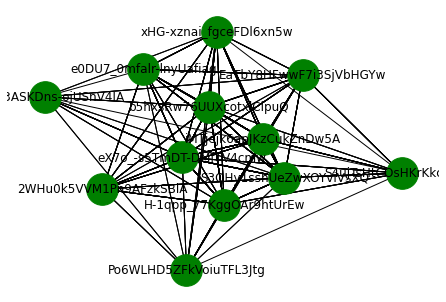

In [24]:
G=nx.MultiGraph()
G.add_nodes_from(nodes_unique)
G.add_edges_from(edge)
nx.draw(G, node_color = 'green',node_size = 1000,with_labels = True)

#### Drawing the network graph for 'Montecito' city in CA.

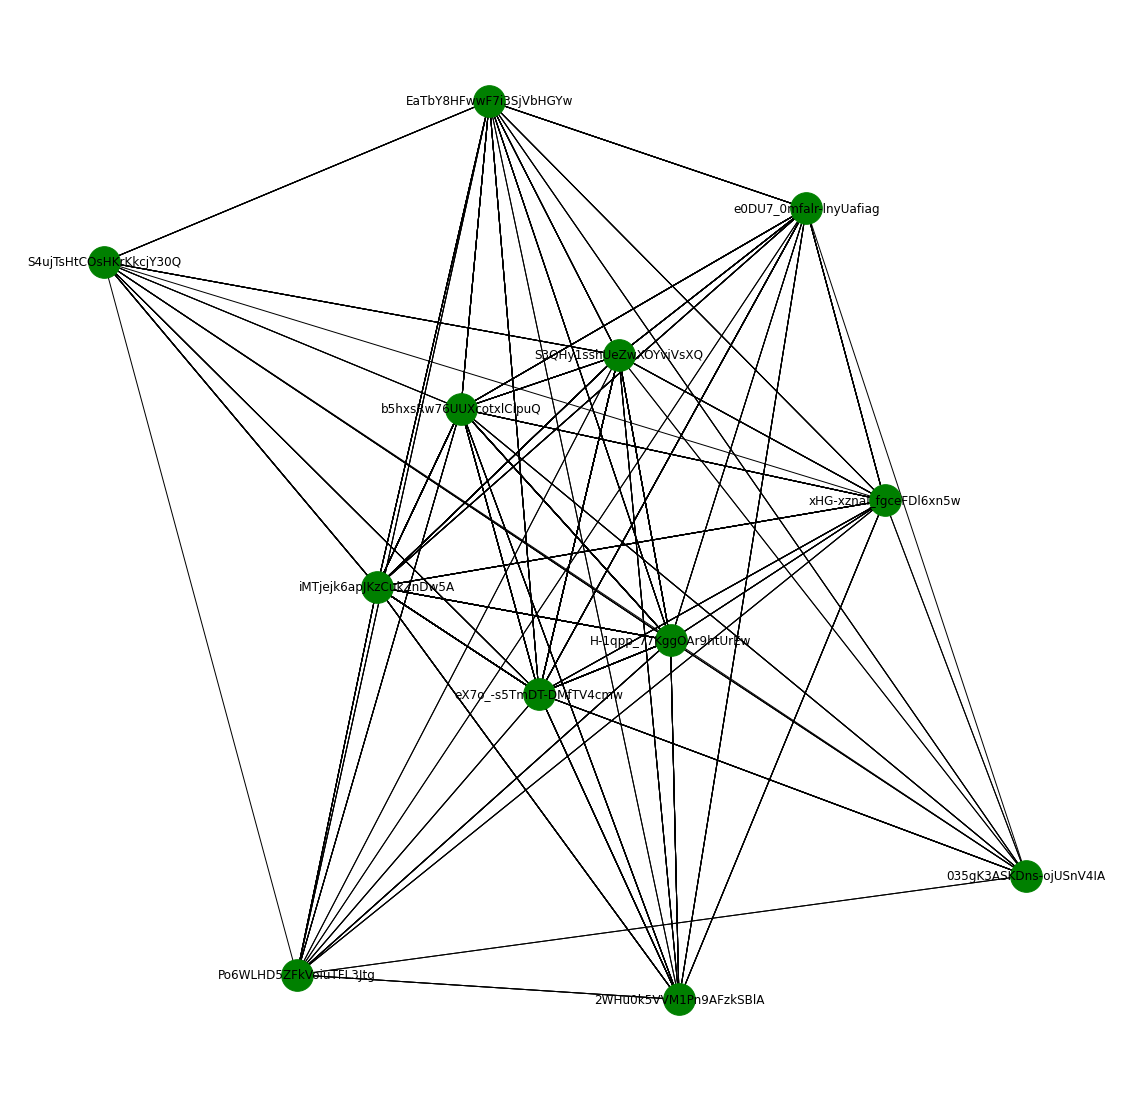

In [25]:
fig, ax = plt.subplots(figsize=(20,20))
nx.draw(G,node_color = 'green',node_size = 1000,with_labels = True, ax=ax) 
plt.savefig("montecito_CA.png")

In [26]:
d=nx.degree_centrality(G)
print("Degree Centalities for the graph G is: \n",d)

Degree Centalities for the graph G is: 
 {'035gK3ASKDns-ojUSnV4IA': 2.272727272727273, 'EaTbY8HFwwF7i3SjVbHGYw': 5.818181818181818, 'eX7o_-s5TmDT-DMfTV4cmw': 11.727272727272728, 'b5hxsRw76UUXcotxlCipuQ': 10.0, 'H-1qpp_77KggOAr9htUrEw': 10.090909090909092, 'Po6WLHD5ZFkVoiuTFL3Jtg': 3.3636363636363638, 'S3QHy1sshUeZwXOYviVsXQ': 9.0, 'xHG-xznai_fgceFDl6xn5w': 5.181818181818182, 'S4ujTsHtCOsHKrKkcjY30Q': 3.0, 'e0DU7_0mfalr-lnyUafiag': 5.909090909090909, '2WHu0k5VVM1Pn9AFzkSBlA': 4.636363636363637, 'iMTjejk6apJKzCukZnDw5A': 11.90909090909091}


In [27]:
avg_deg_cent= sum(d.values())/len(d.values())
avg_deg_cent

6.90909090909091

In [28]:
adj=nx.adjacency_matrix(G)
print(adj.todense()) 

[[ 0  3  7  4  3  2  2  2  1  1  0  0]
 [ 3  0  8 10  7  3  7  4  5  7  2  8]
 [ 7  8  0 11 21  3 22  6  5 11  9 26]
 [ 4 10 11  0 18  5 10  8  3 11  7 23]
 [ 3  7 21 18  0  6 14  5  4  4  8 21]
 [ 2  3  3  5  6  0  2  3  1  2  3  7]
 [ 2  7 22 10 14  2  0  6  6 10  5 15]
 [ 2  4  6  8  5  3  6  0  1  7  5 10]
 [ 1  5  5  3  4  1  6  1  0  0  0  7]
 [ 1  7 11 11  4  2 10  7  0  0  5  7]
 [ 0  2  9  7  8  3  5  5  0  5  0  7]
 [ 0  8 26 23 21  7 15 10  7  7  7  0]]


### OUTCOMES:
- The above graph shows us the total businesses as nodes and there related user ids as edges.
- State selected is **California** and the metropolitian city selected is **Montecito**. The number of reviews selected for the businesses is **105**.
- The total number of nodes/business extracted are **12**. Total number of connections/edges between these businesses are **456**.
- The average degree centrality for all the nodes in the graph is **6.90909**.

## Selecting 'Santa Barbara' Metropolitan area 

In [29]:
metropolitian_area=['Santa Barbara']
data_city2=CA.loc[CA['city'].isin(metropolitian_area)]
data_city2

business_id                      name  \
0        Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1        Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
2        Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
3        Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
4        Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
...                         ...                       ...   
6988236  JhSByBTYY1rGstRy76YmLA         Reiki with Darren   
6988237  JhSByBTYY1rGstRy76YmLA         Reiki with Darren   
6988238  JhSByBTYY1rGstRy76YmLA         Reiki with Darren   
6988239  JhSByBTYY1rGstRy76YmLA         Reiki with Darren   
6988240  JhSByBTYY1rGstRy76YmLA         Reiki with Darren   

                        address           city state postal_code   latitude  \
0        1616 Chapala St, Ste 2  Santa Barbara    CA       93101  34.426679   
1        1616 Chapala St, Ste 2  Santa Barbara    CA       93101  34.426679   
2        1616 Chapala St, Ste 2  Santa Barbara    CA       93101  34.426679   
3        1616 Chapala St, Ste 2  Santa Barbara    CA       93101  34.426679   
4        1616 Chapala St, Ste 2  Santa Barbara    CA       93101  34.426679   
...                         ...            ...   ...         ...        ...   
6988236                     NaN  Santa Barbara    CA       93105  34.420831   
6988237                     NaN  Santa Barbara    CA       93105  34.420831   
6988238                     NaN  Santa Barbara    CA       93105  34.420831   
6988239                     NaN  Santa Barbara    CA       93105  34.420831   
6988240                     NaN  Santa Barbara    CA       93105  34.420831   

          longitude  stars  review_count  is_open  \
0       -119.711197    5.0             7        0   
1       -119.711197    5.0             7        0   
2       -119.711197    5.0             7        0   
3       -119.711197    5.0             7        0   
4       -119.711197    5.0             7        0   
...             ...    ...           ...      ...   
6988236 -119.698190    5.0             7        1   
6988237 -119.698190    5.0             7        1   
6988238 -119.698190    5.0             7        1   
6988239 -119.698190    5.0             7        1   
6988240 -119.698190    5.0             7        1   

                                                attributes  \
0                            {'ByAppointmentOnly': 'True'}   
1                            {'ByAppointmentOnly': 'True'}   
2                            {'ByAppointmentOnly': 'True'}   
3                            {'ByAppointmentOnly': 'True'}   
4                            {'ByAppointmentOnly': 'True'}   
...                                                    ...   
6988236  {'BusinessAcceptsCreditCards': 'True', 'ByAppo...   
6988237  {'BusinessAcceptsCreditCards': 'True', 'ByAppo...   
6988238  {'BusinessAcceptsCreditCards': 'True', 'ByAppo...   
6988239  {'BusinessAcceptsCreditCards': 'True', 'ByAppo...   
6988240  {'BusinessAcceptsCreditCards': 'True', 'ByAppo...   

                                                categories  \
0        Doctors, Traditional Chinese Medicine, Naturop...   
1        Doctors, Traditional Chinese Medicine, Naturop...   
2        Doctors, Traditional Chinese Medicine, Naturop...   
3        Doctors, Traditional Chinese Medicine, Naturop...   
4        Doctors, Traditional Chinese Medicine, Naturop...   
...                                                    ...   
6988236  Health & Medical, Supernatural Readings, Hospi...   
6988237  Health & Medical, Supernatural Readings, Hospi...   
6988238  Health & Medical, Supernatural Readings, Hospi...   
6988239  Health & Medical, Supernatural Readings, Hospi...   
6988240  Health & Medical, Supernatural Readings, Hospi...   

                                                     hours  \
0                                                      NaN   
1                                                      NaN   
2                        

### a. Identify the total number of reviews for each business in one metropolitan area.

In [30]:
data_city2_group=data_city2.groupby('business_id')['review_count'].agg('mean').reset_index()
data_city2_group

business_id  review_count
0     --O3ip9NpXTKD4oBS1pY2A          65.0
1     -06ngMH_Ejkm_6HQBYxB7g          25.0
2     -0hxpkIpBh2T0tvdM1mSIw          10.0
3     -1g8Qb6t_mSX_ak1thMmrQ          48.0
4     -3AooxIkg38UyUdlz5oXdw         436.0
...                      ...           ...
3824  zttPNNUD5QCxm__L39DAmg           6.0
3825  zu4p6IZLSVn2Noto-vcwzw         169.0
3826  zv_3f5U_-7v3UJzpgfhzGQ          23.0
3827  zv_X_rMjwJ__sDvjPBVHyA          17.0
3828  zxW8zECvT_SqejieMMjb5A          14.0

[3829 rows x 2 columns]

b) **R selected is 105** , so selecting the data with review count more than 105

In [31]:
df_105=data_city2.loc[(data_city2['review_count'] >= 105)]
df_105

business_id                  name                address  \
3650     IDtLPgUrqorrpqSLdfMhZQ  Helena Avenue Bakery  131 Anacapa St, Ste C   
3651     IDtLPgUrqorrpqSLdfMhZQ  Helena Avenue Bakery  131 Anacapa St, Ste C   
3652     IDtLPgUrqorrpqSLdfMhZQ  Helena Avenue Bakery  131 Anacapa St, Ste C   
3653     IDtLPgUrqorrpqSLdfMhZQ  Helena Avenue Bakery  131 Anacapa St, Ste C   
3654     IDtLPgUrqorrpqSLdfMhZQ  Helena Avenue Bakery  131 Anacapa St, Ste C   
...                         ...                   ...                    ...   
6987863  uriD7RFuHhLJeDdKaf0nFA            Pizza Guru          3534 State St   
6987864  uriD7RFuHhLJeDdKaf0nFA            Pizza Guru          3534 State St   
6987865  uriD7RFuHhLJeDdKaf0nFA            Pizza Guru          3534 State St   
6987866  uriD7RFuHhLJeDdKaf0nFA            Pizza Guru          3534 State St   
6987867  uriD7RFuHhLJeDdKaf0nFA            Pizza Guru          3534 State St   

                  city state postal_code   latitude   longitude  stars  \
3650     Santa Barbara    CA       93101  34.414445 -119.690672    4.0   
3651     Santa Barbara    CA       93101  34.414445 -119.690672    4.0   
3652     Santa Barbara    CA       93101  34.414445 -119.690672    4.0   
3653     Santa Barbara    CA       93101  34.414445 -119.690672    4.0   
3654     Santa Barbara    CA       93101  34.414445 -119.690672    4.0   
...                ...   ...         ...        ...         ...    ...   
6987863  Santa Barbara    CA       93105  34.440689 -119.739681    4.0   
6987864  Santa Barbara    CA       93105  34.440689 -119.739681    4.0   
6987865  Santa Barbara    CA       93105  34.440689 -119.739681    4.0   
6987866  Santa Barbara    CA       93105  34.440689 -119.739681    4.0   
6987867  Santa Barbara    CA       93105  34.440689 -119.739681    4.0   

         review_count  is_open  \
3650              389        1   
3651              389        1   
3652              389        1   
3653              389        1   
3654              389        1   
...               ...      ...   
6987863           299        0   
6987864           299        0   
6987865           299        0   
6987866           299        0   
6987867           299        0   

                                                attributes  \
3650     {'RestaurantsTakeOut': 'True', 'NoiseLevel': "...   
3651     {'RestaurantsTakeOut': 'True', 'NoiseLevel': "...   
3652     {'RestaurantsTakeOut': 'True', 'NoiseLevel': "...   
3653     {'RestaurantsTakeOut': 'True', 'NoiseLevel': "...   
3654     {'RestaurantsTakeOut': 'True', 'NoiseLevel': "...   
...                                                    ...   
6987863  {'NoiseLevel': "u'average'", 'RestaurantsGoodF...   
6987864  {'NoiseLevel': "u'average'", 'RestaurantsGoodF...   
6987865  {'NoiseLevel': "u'average'", 'RestaurantsGoodF...   
6987866  {'NoiseLevel': "u'average'", 'RestaurantsGoodF...   
6987867  {'NoiseLevel': "u'average'", 'RestaurantsGoodF...   

                                                categories  \
3650     Food, Restaurants, Salad, Coffee & Tea, Breakf...   
3651     Food, Restaurants, Salad, Coffee & Tea, Breakf...   
3652     Food, Restaurants, Salad, Coffee & Tea, Breakf...   
3653     Food, Restaurants, Salad, Coffee & Tea, Breakf...   
3654     Food, Restaurants, Salad, Coffee & Tea, Breakf...   
...                                                    ...   
6987863                           Restaurants, Pizza, Food   
6987864                           Restaurants, Pizza, Food   
6987865                           Restaurants, Pizza, Food   
6987866                           Restaurants, Pizza, Food   
6987867                           Restaurants, Pizza, Food   

                                                     hours  \
3650     {'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '...   
3651     {'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '...   
3652     {'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '...   
3653     {'Monday': '0:

**c. Among the remaining businesses, when two businesses have been reviewed by the same reviewer, connect them.**

In [32]:
df_copy2=df_105.copy()
df_copy_group2=df_copy2.groupby(['business_id','user_id'],as_index=False).sum()
df100=df_copy_group2.drop(['latitude','longitude','stars','review_count','is_open'],axis=1)
df100

business_id                 user_id
0       -3AooxIkg38UyUdlz5oXdw  -576v3Lj76p5I5OOUEhD3Q
1       -3AooxIkg38UyUdlz5oXdw  -B-QEUESGWHPE_889WJaeg
2       -3AooxIkg38UyUdlz5oXdw  -EBRDm7vbWvbLs0zqWxgiw
3       -3AooxIkg38UyUdlz5oXdw  -FvtsPvBFaei8OZDEO6IKw
4       -3AooxIkg38UyUdlz5oXdw  -jpptrZOhThyLl3mXr55ZA
...                        ...                     ...
185545  zu4p6IZLSVn2Noto-vcwzw  yxOxScBL0lyV2NG7Pu9JvA
185546  zu4p6IZLSVn2Noto-vcwzw  zKMW_GoyPuZcUBwRMwdQVg
185547  zu4p6IZLSVn2Noto-vcwzw  zU9qdjqt7Zrrkk6_SuveYg
185548  zu4p6IZLSVn2Noto-vcwzw  zZFrDc2DPCPZfAz7GljnpA
185549  zu4p6IZLSVn2Noto-vcwzw  zecq0D1C283rHNRKy2Ln9w

[185550 rows x 2 columns]

In [33]:
#Sample list of businesses that satisfy the requirement
df100.business_id.unique()

array(['-3AooxIkg38UyUdlz5oXdw', '-6L_z3ftD1iepJb0FfJghw',
       '-8iATYRnN46Km0_-ldx6cg', '-FM4CxOg4XXmX_Ebky_SiQ',
       '-Fka99c-tJ-epWYNIobqyQ', '-H-fZonTLitwHFY_PLAIjA',
       '-I7M6l0h46VdiN09Y1NUZw', '-NXRuUsazxXZZ_OHwmtYtw',
       '-TjT3y-Glfnbt6LbKETAYg', '-e8RwknT5szoLk9uBZjzcw',
       '-ipZBVF9nWm1vzrvQ3444A', '-kY_HDP7IMvGl-kBIZVU4A',
       '-kfHz1kimX62QEceFkkB_g', '-loV4cB2Uh9TCltTRgGzWQ',
       '-mHLlBqekJe_VC61ouI9yA', '-r6nmLB5Vi2TLQCxh0_dtw',
       '-ujBP1Dw0j1-Ffaz97-LXQ', '0CHIbqSkGWBr2KMkIUocEA',
       '0P27vtNdYLy1vNu1Lc85Og', '0RxU5OglQyPVtLKC1LPgsA',
       '0WrdiQ4qJBu2Gc7wRcIfdw', '0ac5lGA_0wdKDnib3y59Xg',
       '0cWnURpfrb4MqKSzyVN4SQ', '0jpFptAehZhLl3nkhHDanA',
       '0qu0fNTOsSmuREYVIMPuIQ', '0t1pU_Ky3Jvgq5Ya_OC1pA',
       '0tbscjPg4IzURekIn_CJ1Q', '13UbOVDFdxloxaient5XWA',
       '1Du1NruqJwxnzgEUHc42Jw', '1PoZ8XdISWJpvcEnlNyfgg',
       '1kVnChI4aqsPw9i2PVqkkw', '1pd4VYTww1UWDVai2r2RKg',
       '1rC0hBT49gVljFQYTIGIaA', '1xsBRB203LiYLcC3mktfdA

In [34]:
user_list2=df100.user_id.unique()
user_list2

array(['-576v3Lj76p5I5OOUEhD3Q', '-B-QEUESGWHPE_889WJaeg',
       '-EBRDm7vbWvbLs0zqWxgiw', ..., 'xb47icCIhKPvAP_D-u6HlQ',
       'xycmMcPSt4QuMrcF6z-Q3A', 'yHq8851rlklPRwBY5Ic6pQ'], dtype=object)

In [35]:
#extracting edge list
edge1=[]
nodes=[]
df_nodes1 = pd.DataFrame()
for i in user_list:
    dfl=df100.loc[df100['user_id']==i]
    # Excluding the data with user_id having only one business
    if len(dfl)>1:
        L=dfl.business_id.tolist()
        df_nodes1=df_nodes1.append(dfl)
        v = len(L)-1
        for j in range(v):
            for k in range(j, v):
                z = k+1
                e = (L[j], L[z])
                edge1.append(e)

In [36]:
# Sample list of businesses with common reviewers 
df_nodes1

business_id                 user_id
4923    -r6nmLB5Vi2TLQCxh0_dtw  -VWzgY7WM2e5oQI_Zl37OQ
65573   KSYONgGtrK0nKXfroB-bwg  -VWzgY7WM2e5oQI_Zl37OQ
75234   O3jPfTDRn5_1O3ZM_LuxQw  -gTBP4tSM6R9XwYK_bdKyA
174109  xIxaczgUFRr5C1LNbQSKow  -gTBP4tSM6R9XwYK_bdKyA
10567   1kVnChI4aqsPw9i2PVqkkw  0y4V3IbJ6x2gTFVvtwn_sA
...                        ...                     ...
179355  yPSejq3_erxo9zdVYTBnZA  zJIpM80K_6C6XMmgeBjdSg
180840  z31te0YMSegTdktp3qYqGw  zJIpM80K_6C6XMmgeBjdSg
181687  z9-8KvMAlVK46De-G3sNJQ  zJIpM80K_6C6XMmgeBjdSg
2097    -FM4CxOg4XXmX_Ebky_SiQ  zK4R5IFl5aBqePPEd0fvxw
183023  zbrIMldF_O1ZQ0vpUaaa8A  zK4R5IFl5aBqePPEd0fvxw

[11267 rows x 2 columns]

In [37]:
nodes_unique2 = list(df_nodes1.business_id.unique())
nodes_unique2

['-r6nmLB5Vi2TLQCxh0_dtw',
 'KSYONgGtrK0nKXfroB-bwg',
 'O3jPfTDRn5_1O3ZM_LuxQw',
 'xIxaczgUFRr5C1LNbQSKow',
 '1kVnChI4aqsPw9i2PVqkkw',
 'EZc2myE2mYk2h9JK9qu8gw',
 'eHRzuUXA2jrR99ecioWU4g',
 'lnjYuK2sAg8qxTvvlnhNFg',
 '0RxU5OglQyPVtLKC1LPgsA',
 'VOcGcN0bvGU_nzxbJgR5jQ',
 '-FM4CxOg4XXmX_Ebky_SiQ',
 'oGDGlUbOjHxmmCh8ZYcDCg',
 'GuzbBFraIq-fbkjfvaTRvg',
 'acGar5SCfNF2v2Vx7EX6dQ',
 'wMZAnrfwV-qHiV5zdTSrzw',
 '3lty2YUwjp61iUqNgKVEMw',
 'NDwoKO79_T49UEKVDlHd3A',
 'r2IhvKZQ_wLR5mLBnPOilg',
 'sjm9TFtN69KrVsgajcL2Pg',
 '-TjT3y-Glfnbt6LbKETAYg',
 '3Wy21heeDm8h2tSZfcj6OA',
 'BErYojCJSO959vzaz9JclQ',
 'EtM079Cj7-B3G7jPsGYb_Q',
 'UA3HxLprLSOO9J6l1iR2Cg',
 'XyYsl2OyoMi6OMvzsdcVoQ',
 'nnn78cplvQGZSMVblpI5gQ',
 'o4IiNbNybcy-L4vzTSoDJw',
 'vj6AetpADpHOYtMRZsXX3g',
 'yPSejq3_erxo9zdVYTBnZA',
 '4uspKB1d3pGdgjOClA-UkQ',
 '6RBZfirnzE4NahJTn1UPNA',
 'B_q2xoAgTyn6U4YNEc3kSw',
 'E1R-xslwl7XeTN5lQ7mWPg',
 'QBNATcq7Stx9LxcSq16W7w',
 'U3grYFIeu6RgAAQgdriHww',
 'ejqpFQ0dwO7AZhxTO9fySg',
 'f3eve2cxUIzyanWnHdMtFQ',
 

In [38]:
len(nodes_unique2)

550

In [39]:
len(edge1)

177549

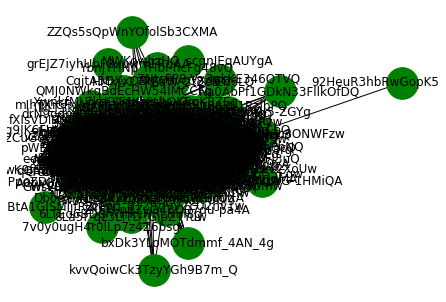

In [40]:
G2=nx.MultiGraph()
G2.add_nodes_from(nodes_unique2)
G2.add_edges_from(edge1)
nx.draw(G2, node_color = 'green',node_size = 1000,with_labels = True)

#### Drawing the network graph for 'Santa Barbara' city in CA.

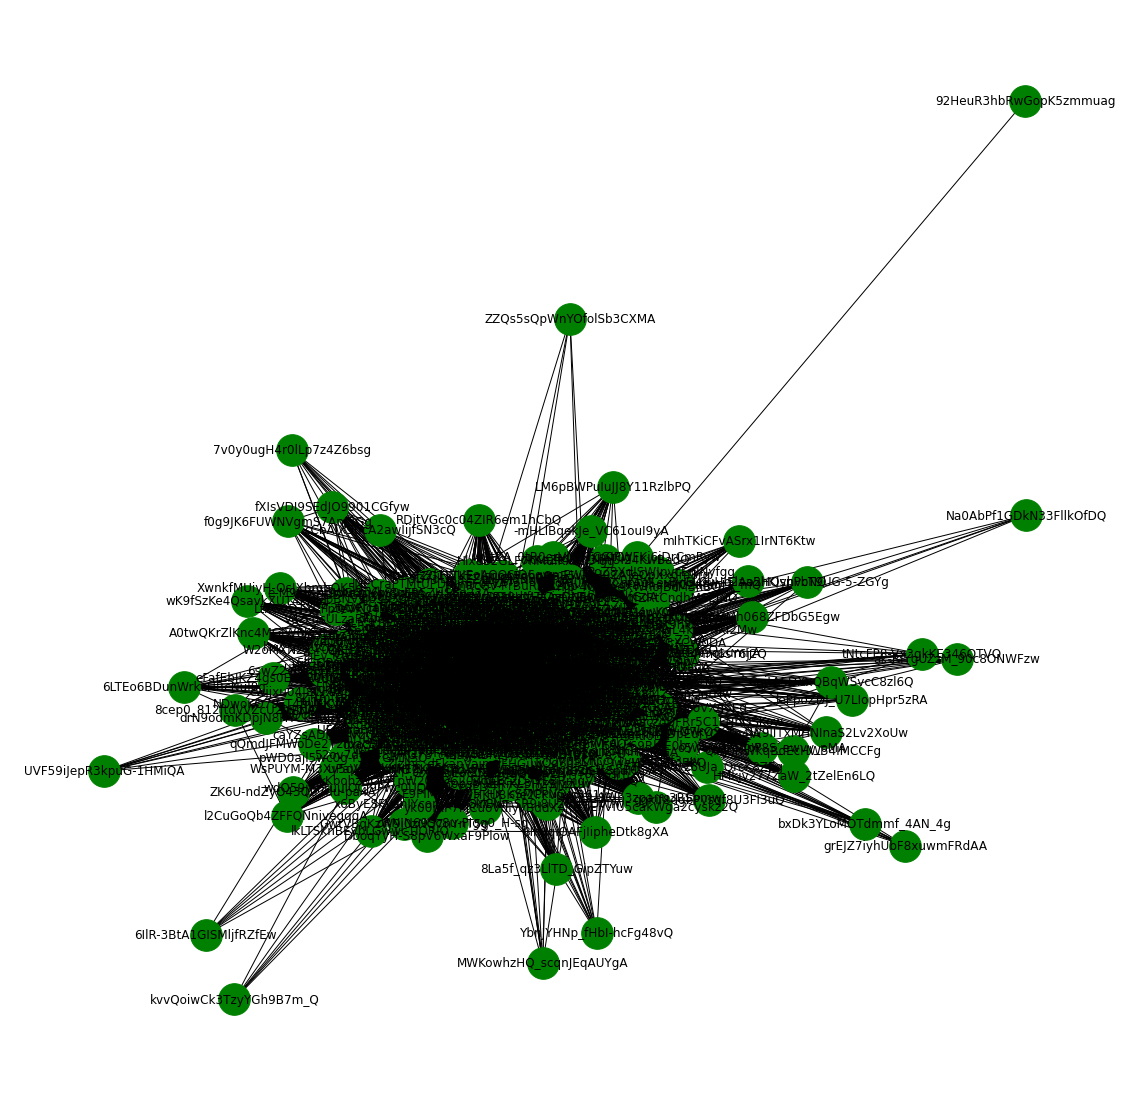

In [41]:
fig, ax = plt.subplots(figsize=(20,20))
nx.draw(G2,node_color = 'green',node_size = 1000,with_labels = True, ax=ax)
plt.savefig("santabarbara_CA.png")

In [42]:
d2=nx.degree_centrality(G2)
print("Degree Centalities for the graph G2 is: \n",d2)

Degree Centalities for the graph G2 is: 
 {'-r6nmLB5Vi2TLQCxh0_dtw': 0.9799635701275046, 'KSYONgGtrK0nKXfroB-bwg': 2.4754098360655736, 'O3jPfTDRn5_1O3ZM_LuxQw': 0.5774134790528234, 'xIxaczgUFRr5C1LNbQSKow': 0.17304189435336975, '1kVnChI4aqsPw9i2PVqkkw': 1.384335154826958, 'EZc2myE2mYk2h9JK9qu8gw': 2.70856102003643, 'eHRzuUXA2jrR99ecioWU4g': 1.3970856102003644, 'lnjYuK2sAg8qxTvvlnhNFg': 0.5409836065573771, '0RxU5OglQyPVtLKC1LPgsA': 1.95264116575592, 'VOcGcN0bvGU_nzxbJgR5jQ': 1.8105646630236794, '-FM4CxOg4XXmX_Ebky_SiQ': 4.628415300546448, 'oGDGlUbOjHxmmCh8ZYcDCg': 2.978142076502732, 'GuzbBFraIq-fbkjfvaTRvg': 1.9544626593806922, 'acGar5SCfNF2v2Vx7EX6dQ': 0.33879781420765026, 'wMZAnrfwV-qHiV5zdTSrzw': 1.7759562841530054, '3lty2YUwjp61iUqNgKVEMw': 1.2404371584699454, 'NDwoKO79_T49UEKVDlHd3A': 0.151183970856102, 'r2IhvKZQ_wLR5mLBnPOilg': 3.6357012750455375, 'sjm9TFtN69KrVsgajcL2Pg': 1.639344262295082, '-TjT3y-Glfnbt6LbKETAYg': 2.75591985428051, '3Wy21heeDm8h2tSZfcj6OA': 4.204007285974499, '

In [43]:
avg_deg_cent2= sum(d2.values())/len(d2.values())
avg_deg_cent2

1.176015896671634

In [44]:
adj2=nx.adjacency_matrix(G2)
print(adj2.todense()) 

[[0 2 0 ... 0 0 0]
 [2 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [45]:
adj2.shape[0]

550

### OUTCOMES:
- State selected is **California** and the metropolitan city selected is **Santa Barbara**. The number of reviews selected for the businesses is **105**.
- The total number of nodes/business extracted are **550**. Total number of connections/edges between these businesses are **177549**.
- The average degree centrality for all the nodes in the graph is **1.17601**.

### f. Do you see any difference in these two values? Explain. 
- For the same number of reviews and above (i.e.,105) for two different metropolitan area in California the total number of businesses which was reviewed by the users differs a lot.
- For **Montecito** the number of businesses extracted were **12** but whereas the number of businesses for **Santa Barbara** were **550**.
- The number of edges between these nodes were **456** for Montecito and **177549** for Santa Barbara.
- The average degree centrality for all the nodes for Montecito is **6.90909** but whereas average degree centrality for all the nodes for Santa Barbara is **1.17601**.
- The above statistics tells us that the businesses in Santa Barbara were reviewed more than that of Montecito.
- From average degree centrality it can be said that more users reviewed for similar businesses in Montecito than that of the businesses in Santa Barbara. It can also be said that the businesses in Montecito have more connections than Santa Barbara.
- The adjacency matrix for Santa barbara is more sparse than that of the Montecito. 

## Writing a code block with all the functions used in the notebook

In [46]:
def project(state,review,metropolitian_area):
    print("state selected is:",state)
    print("Review count selected is:",review)
    print("City selected is:",metropolitian_area)
    staten=merge.loc[merge['state'].isin([state])]
    data_cityn=staten.loc[staten['city'].isin([metropolitian_area])]
    #data_cityn_group=data_cityn.groupby('business_id')['review_count'].agg('mean').reset_index()
    state_rev=data_cityn.loc[(data_cityn['review_count'] >= review)]

    df_copy_groupn=state_rev.groupby(['business_id','user_id'],as_index=False).sum()
    dfn=df_copy_groupn.drop(['latitude','longitude','stars','review_count','is_open'],axis=1)
    print("--------------------------------------------------------------------------------------------------")
    print("--------------------------------------------------------------------------------------------------")
    print("user list is")
    user_listn=dfn.user_id.unique()
    print(user_listn)
    print("--------------------------------------------------------------------------------------------------")
    print("--------------------------------------------------------------------------------------------------")

    #extracting edge list
    edgen=[]
    nodes=[]
    df_nodesn = pd.DataFrame()
    for i in user_listn:
        dfl=dfn.loc[dfn['user_id']==i]
        # Excluding the data with user_id having only one business
        if len(dfl)>1:
            L=dfl.business_id.tolist()
            df_nodesn=df_nodesn.append(dfl)
            v = len(L)-1
            for j in range(v):
                for k in range(j, v):
                    z = k+1
                    e = (L[j], L[z])
                    edgen.append(e)
    
    nodes_uniquen = list(df_nodesn.business_id.unique())
    Gn=nx.MultiGraph()
    Gn.add_nodes_from(nodes_uniquen)
    print("Number of Nodes:")
    print(nodes_uniquen)
    print("--------------------------------------------------------------------------------------------------")
    print("--------------------------------------------------------------------------------------------------")
    Gn.add_edges_from(edgen)
    print("Number of edges:")
    print(edgen)
    print("--------------------------------------------------------------------------------------------------")
    print("--------------------------------------------------------------------------------------------------")
    fig, ax = plt.subplots(figsize=(20,20))
    nx.draw(Gn, node_color = 'green',node_size = 1000,with_labels = True, ax=ax)
    #plt.savefig("Turnersville_NJ.png")
    dn=nx.degree_centrality(Gn)
    #print('Degree centralities of the graph are:',dn)
    avg_deg_centn= sum(dn.values())/len(dn.values())
    print('Average degree centrality is:',avg_deg_centn)

state selected is: CA
Review count selected is: 105
City selected is: Summerland
--------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------
user list is
['-Oqfoc4KyhzYY0qvSkxkrg' '-PdQKhiPwIktVAPOr1qByQ'
 '-QM5WxcSE0xf_rB-VkTlqw' ... 'z4_3qo5rS2np16ahrnhGmg'
 'z9_2k80WhfeuUPJie_9QDQ' 'zoLR8iF92uY1TUt8sGuwkg']
--------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------
Number of Nodes:
['-SS3ep20HKhuOhzDkkt9aA', 'A4E8e6ICfwS8V7hJYaCXAQ', 'FdoqtMadj4ybDAL7S-yUBQ', 'wb9P0ipW4ysbgNA9jIl3bg', 'cJXlIGy9SURm12lqHHnf-g', 'uEv1I-0r82Krj4eEysjC4A']
--------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------

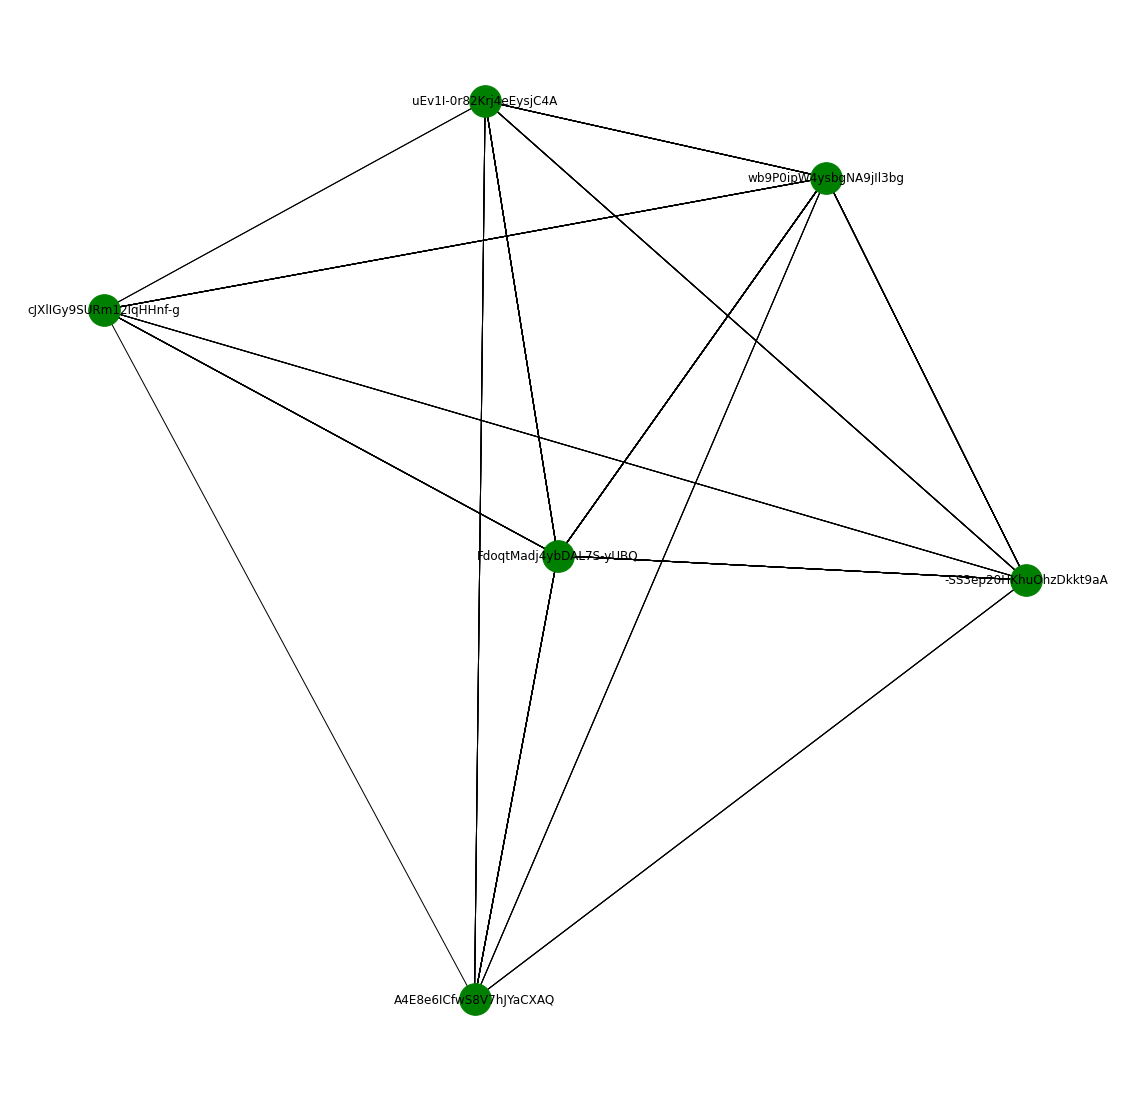

In [47]:
project('CA',105,'Summerland')

state selected is: CA
Review count selected is: 105
City selected is: Goleta
--------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------
user list is
['-B-QEUESGWHPE_889WJaeg' '-H7e0tuMuB99kz9UxlARog'
 '-Oqfoc4KyhzYY0qvSkxkrg' ... 'wHHtsDjqw_PkX_EyE1wSBA'
 'wkK-JuBisVKqiQF0c7JLCw' 'z6WraEomv8CYG7tE87oyhA']
--------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------
Number of Nodes:
['-VvMsFD0W2nQuO9buaeC1g', '06pNHtxgPhGhZpM0Z2uzNw', '6TciI6uBdrd8z1av1YleLg', '9fJziJ3o9-QXKuKolg7yEA', 'A-_GjL5P2ry5OD6WgjhDPA', 'BVzFvRrgMpL62oPIqGvLMg', 'DQgX6IbCPg3SKdFAgWK1uw', 'Eqi8jrVowPBlCKAInDfFRw', 'G0rJD85hUDQ0Omz0rOFeOQ', 'Gof3vW62_EDmqgAPTL-nKQ', 'IZJacI6XEUxy3_wbW76Qfw', 'Jbcvph3PQYXAEUjI7ESA4w', 'KcGCtmMca0EjY_wCv_HN4Q', 

Average degree centrality is: 5.425716625716629


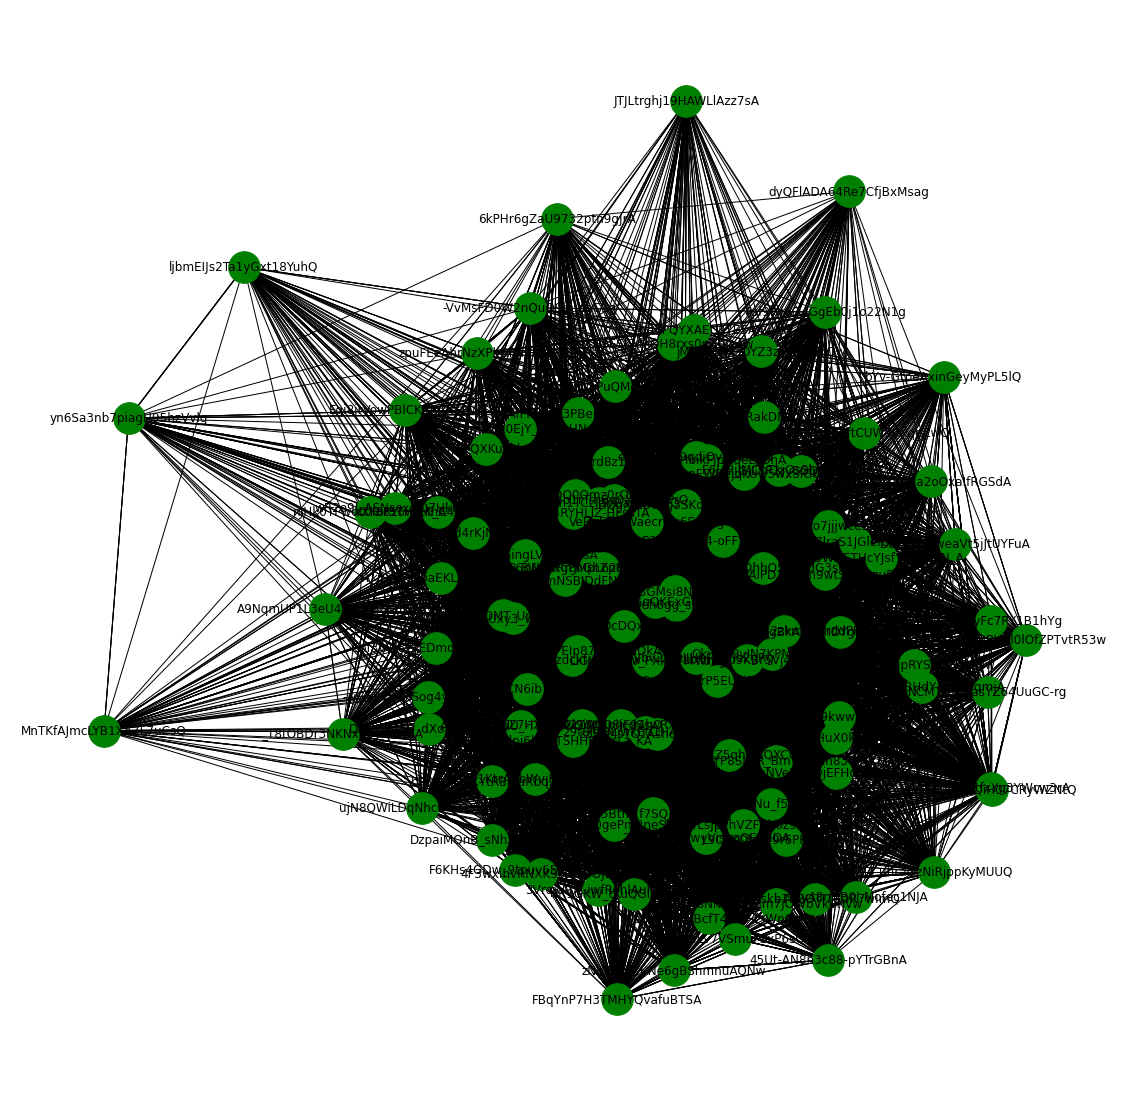

In [48]:
project('CA',105,'Goleta')

state selected is: NJ
Review count selected is: 20
City selected is: West Berlin
--------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------
user list is
['-8onB3ocqDXC0FtxH7-fPg' '3aXKhZ595xtcwkShcM8aqg'
 '5O5w2bNC4Dx7FlFHkA5soQ' ... 'wbW1rsKeX2P0nehsmE5JKg'
 'wi2N04B2wiWdFg0aUvPyQg' 'zDq8kDSLNgK276fTEkumdQ']
--------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------
Number of Nodes:
['296cxLv9GdvbQih-iLtQVA', 'exnUiL89tMOEYwBhegWyrw', 'tYboit2Kxc_WlBhTFp2rCA', 'bDUv7hVlbNaFtNGJv1eS7Q', 'InnnTScV9RKZWy7sOCwHjw', '66DSGnG1t8mFeNsxz7jwKw', 'RDICWWnpw6PhoLi1D7oT6g', 'YjiaGnfaVWVlOzOQ8GK6NA', 'xVCUMtNUj9GCTKeTSq_kxw', 'VVVJceb90meoohfB2VKuyg', 'x-O0dIeIVaVBEhTu_w56DQ', 'RZ-FNTXvqHKngyLGDM-c7w', '8-6ksWmeZdjBLcvKQKYgR

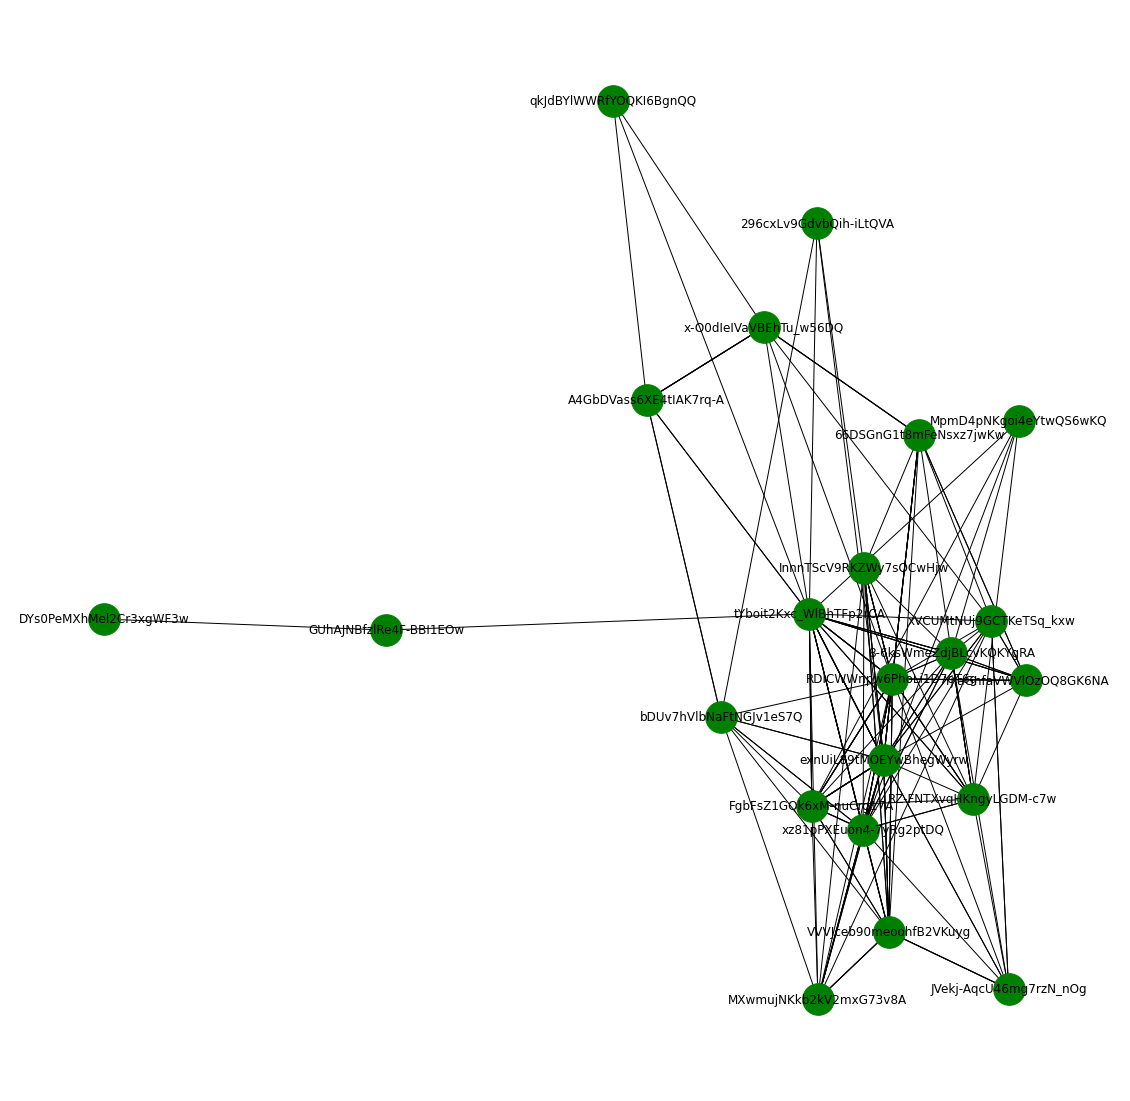

In [49]:
project('NJ',20,'West Berlin')

state selected is: NJ
Review count selected is: 20
City selected is: Turnersville
--------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------
user list is
['-NlT_DEVc15qgr7j21RHvQ' '-YIiS8dsRB9sKeSkCKv7Rg'
 '-kAQ-PSKx3i0st2B4aPpTg' ... 'xpI962N_X0jCjg2jNntyoQ'
 'z3xM33lHr1TuQm9FHmquIw' 'z5Ls3vCw7f0nRBWdzyg_rg']
--------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------
Number of Nodes:
['0006EuNe5LBARerF4RKz4Q', '3kEugtj3tua-yxAZ7yI4XQ', 'HWLXfIxmhG3hETxlhXEg7g', 'K_BoVdQ-FUsNGvxXwHz7Aw', 'MySGoNXh1Cod709_ClJbFw', 'kB0jhYe17R7zobBUXfsP3g', 'JciFC8w1p1kyrqqNEjY8aA', '3Hkfuk0g1A13qmLZbtWrTA', 'cGDyac-6206ey4DEv2ur-Q', 'cTra1xx8NBSp_x7IFi7qXw', 'Hulv-fBg5eX3XkFmqZkqoQ', 'U0PXSZR3mU9l4UyZbG6B7g', 'HOTN7nQufQ-WnBBXsB8-

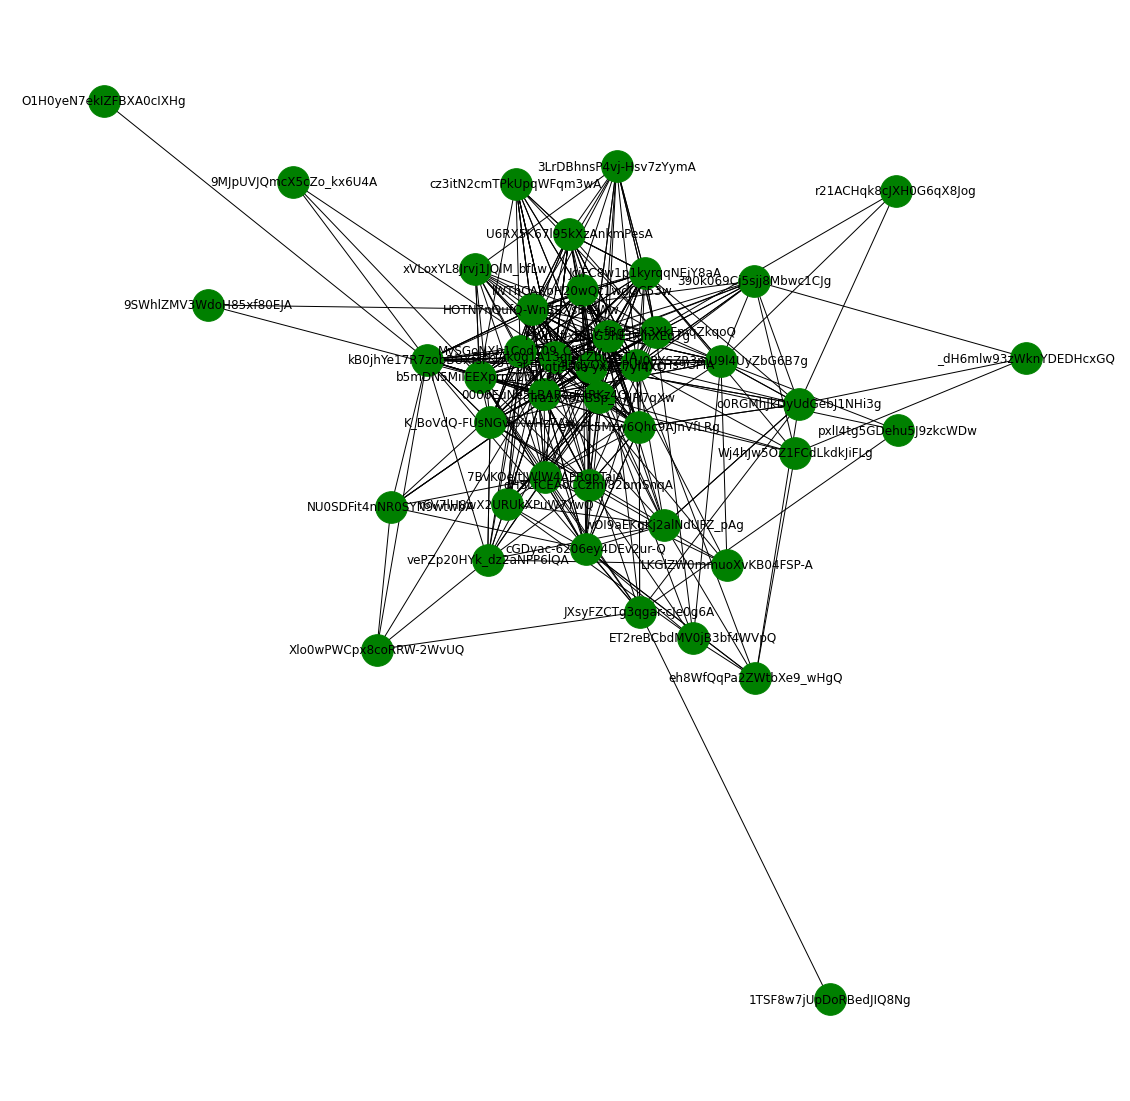

In [50]:
project('NJ',20,'Turnersville')

state selected is: NJ
Review count selected is: 105
City selected is: Turnersville
--------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------
user list is
['-NlT_DEVc15qgr7j21RHvQ' '-YIiS8dsRB9sKeSkCKv7Rg'
 '-kAQ-PSKx3i0st2B4aPpTg' '0-R4O1p7EwwEX7GFQWyFOA'
 '02Ht1pk6ZGFqxNiWEMZSpg' '1lglUspLabvtgITNgHLXZA'
 '25p4JxsPKMc8_AHYuMnBQw' '2t1u-mjNQNytdfszHv7K-w'
 '3-FBAHf23MrTQ14cdY-pjQ' '3IP8zArH7T4v0F3kgp7tBg'
 '3d1jeqKvbDpwq_mNQOqP2Q' '4CcDiRTEfOISZg_EOlnKyg'
 '4StF33ZASP-kBp62BK-KuA' '56oW8yYhPkf0roZ9sYKt5Q'
 '5GZLmxyRPyDg-_7vLA3B6Q' '7PJp6EvTomsOkadVcJ9O_g'
 '889Cdr3-6vi3S3VqYVEj7g' '8FtYzS2UVsJlzH-YfGup9A'
 'Adm05emqn5AchOhcrD1b5Q' 'AkDZt9nbfROk8yVgv7gL_A'
 'AtbMVNlQyL6HftSMOvdFgg' 'BQ0nsGkK9isDOemw6brV5g'
 'BcEHbJuzgKTuqxMQY4AuIA' 'BiDeeouPe0l6_cIFkTRClw'
 'C9U4GaJg8sb5wrgqA49M_A' 'CG9ZhwmuYo0-hoMt9xJ2lg'
 'Cfbiz7mhBWsQcKlP8TCpBw' 'ET2j1IOqD6L8g5Um

Average degree centrality is: 5.0


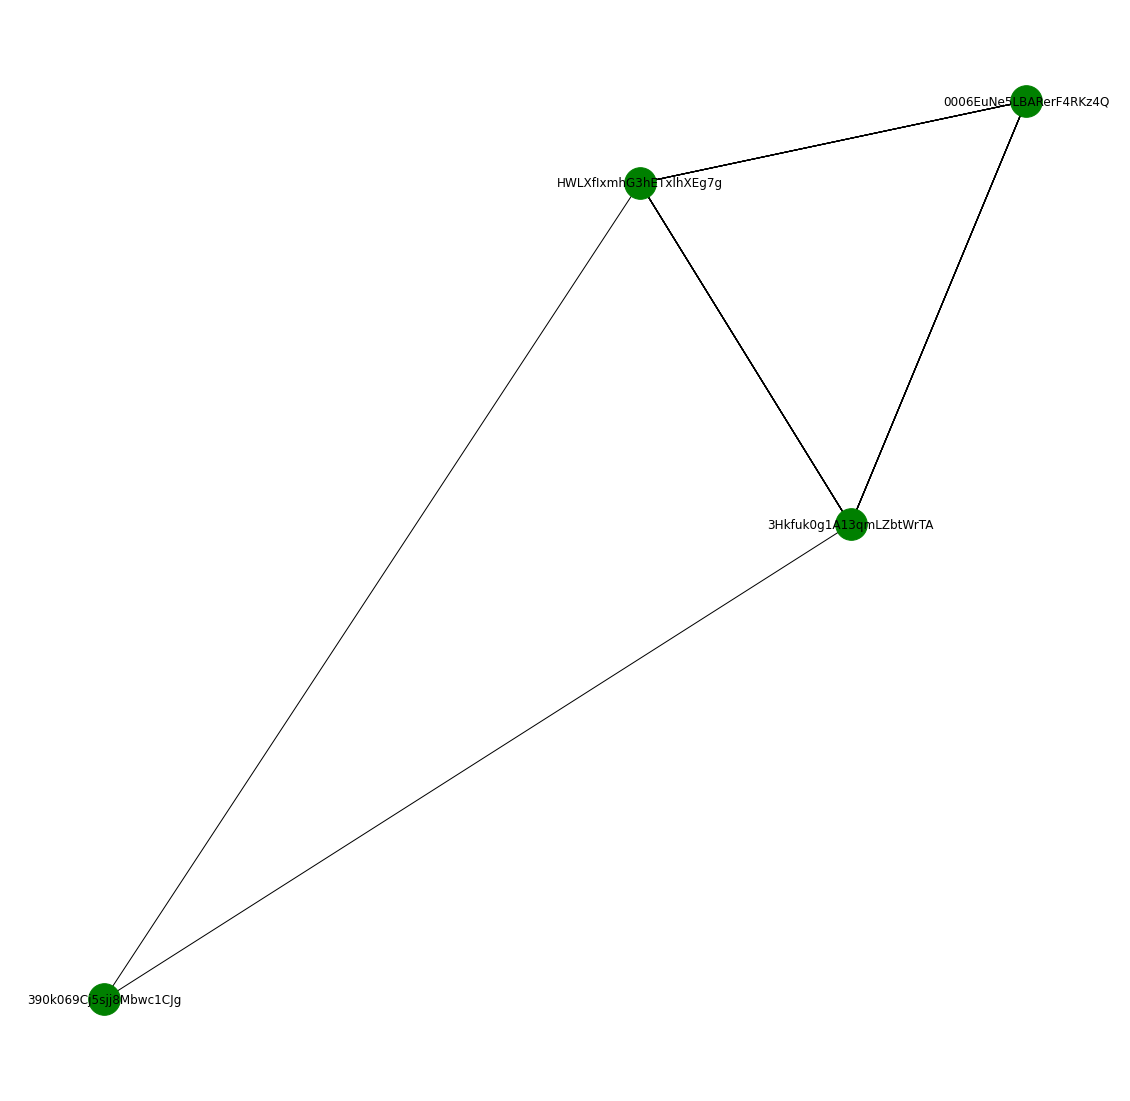

In [51]:
project('NJ',105,'Turnersville')